## <span style="color:black"> PHASE 3 PROJECT SUBMISSION </span>
| Student Pace             | Project Review Date  | Instructor Name     | Blog Post URL  |
|--------------------------|--------------------------|---------------------|----------------|
| `Part Time`                | `September 01st, 2024`      | `Josphat Njuguna Wanjiru`      | _/_               |

**STUDENT NAME: JOSPHAT NJUGUNA WANJIRU**

# <span style="color:black"> SyriaTel CUSTOMER CHURN PREDICTION MODEL </span>

## <span style="color:black"> PROJECT OVERVIEW </span> <a class="anchor" id="first-bullet"></a>

This project seeks to build a Machine Learning classifier algorithm that can predict the probability of customers churning SyriaTel company using data such as

## <span style="color:black"> BUISNESS UNDERSTANDING </span> <a class="anchor" id="first-bullet"></a>

Syriatel is a mobile network provider in Syria.[1] It is one of the only two providers in Syria, the other being MTN Syria. In 2022 the Syrian telecommunications authority awarded the third telecom license to Wafa Telecom.[3] It offers LTE with 150 Mb/s speeds, under the brand name Super Sur

## <span style="color:black"> BUSINESS PROBLEM </span> <a class="anchor" id="fourth-bullet"></a>

The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business. Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. (In other words, acquiring that customer may have actually been a losing investment.) Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer

Customer churn is the loss of clients or customers. Predicting churn can help the Telecom company, so it can effectively focus a customer retention marketing program (e.g. a special offer) to the subset of clients which are most likely to change their carrier. Therefore, the “churn” column is chosen as target and the following predictive analysis is a supervised classification problem.

## <span style="color:black"> BUSINESS AIM AND OBJECTIVES </span> <a class="anchor" id="fifth-bullet"></a>

The aim of this project is to predict customer churn and retention in SyriaTel company

The objectives of the are:

1. 

#### **`STUDY QUESTIONS:`**<br> <a class="anchor" id="sixth-bullet"></a>


## <span style="color:black"> DATA UNDERSTANDING </span>

### <span style="color:black"> 

In [195]:
# scientific computing libaries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data mining libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA#, FastICA
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, label_binarize
from sklearn.preprocessing import OneHotEncoder

## <span style="color:black"> DATA UNDERSTANDING </span>

### <span style="color:red">

The dataset contains data on the customers of a SyriaTel Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

In [174]:
# Import the SyriaTel customer data
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv')

In [175]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



Rows 3333
Columns 21
Each row is a customer



| Field Name                 | Description                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------|
| **state**                  | The state the user lives in                                                                   |
| **account length**         | The number of days the user has had this account                                              |
| **area code**              | The code of the area the user lives in                                                        |
| **phone number**           | The phone number of the user                                                                  |
| **international plan**     | `true` if the user has the international plan, otherwise `false`                              |
| **voice mail plan**        | `true` if the user has the voice mail plan, otherwise `false`                                 |
| **number vmail messages**  | The number of voice mail messages the user has sent                                           |
| **total day minutes**      | Total number of minutes the user has been in calls during the day                             |
| **total day calls**        | Total number of calls the user has made during the day                                        |
| **total day charge**       | Total amount of money the user was charged by the Telecom company for calls during the day    |
| **total eve minutes**      | Total number of minutes the user has been in calls during the evening                         |
| **total eve calls**        | Total number of calls the user has made during the evening                                    |
| **total eve charge**       | Total amount of money the user was charged by the Telecom company for calls during the evening|
| **total night minutes**    | Total number of minutes the user has been in calls during the night                           |
| **total night calls**      | Total number of calls the user has made during the night                                      |
| **total night charge**     | Total amount of money the user was charged by the Telecom company for calls during the night  |
| **total intl minutes**     | Total number of minutes the user has been in international calls                              |
| **total intl calls**       | Total number of international calls the user has made                                         |
| **total intl charge**      | Total amount of money the user was charged by the Telecom company for international calls     |
| **customer service calls** | Number of customer service calls the user has made                                            |
| **churn**                  | `true` if the user terminated the contract, otherwise `false`                                 |

### `Target Labels`
The labels in this dataset are binary. The two target variables in the target column churn are:
False - The customer is retained
True - The customer churns the SyriaTel company



## <span style="color:black">EXPLORATORY DATA ANALYSIS (EDA)</span> <a class="anchor" id="eighth-bullet"></a>
In the EDA section, we explored the various features in the data, clean and tranform some of the features.

In [176]:
#checking data  shape
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 3333
Number of columns = 21


In [177]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Feature Engineering of Area Code and Churn Variable

The target variable 'churn' was converted from boolean to object and area code was converted from numeric to categorical 

In [178]:
# Feature Enginnering of Area code from mumerical to categorical
df['area code'] = df['area code'].astype(str)
# Feature Engineering of churn Variable from boolean datatype to object
df['churn'] = df['churn'].map({True: 'Yes', False: 'No'}).astype('object')
df['churn'].head()

0    No
1    No
2    No
3    No
4    No
Name: churn, dtype: object

In [179]:
# checking for duplicates
df.duplicated().sum()

0

There are no duplicate values

In [180]:
# Checking for missing values 
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not contain any significant number of NaN values

In [181]:
# Computing the descriptive statistics
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


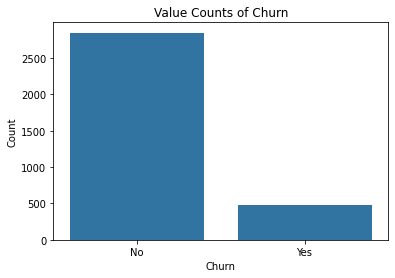

In [182]:
# Check the value counts of the 'churn' column
y = df["churn"].value_counts()

# Create a bar plot of the value counts
sns.barplot(x=y.index, y=y.values)

# Set labels for the plot
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Value Counts of Churn')

# Display the plot
plt.show()

### Observation
The target variables are highly imbalanced

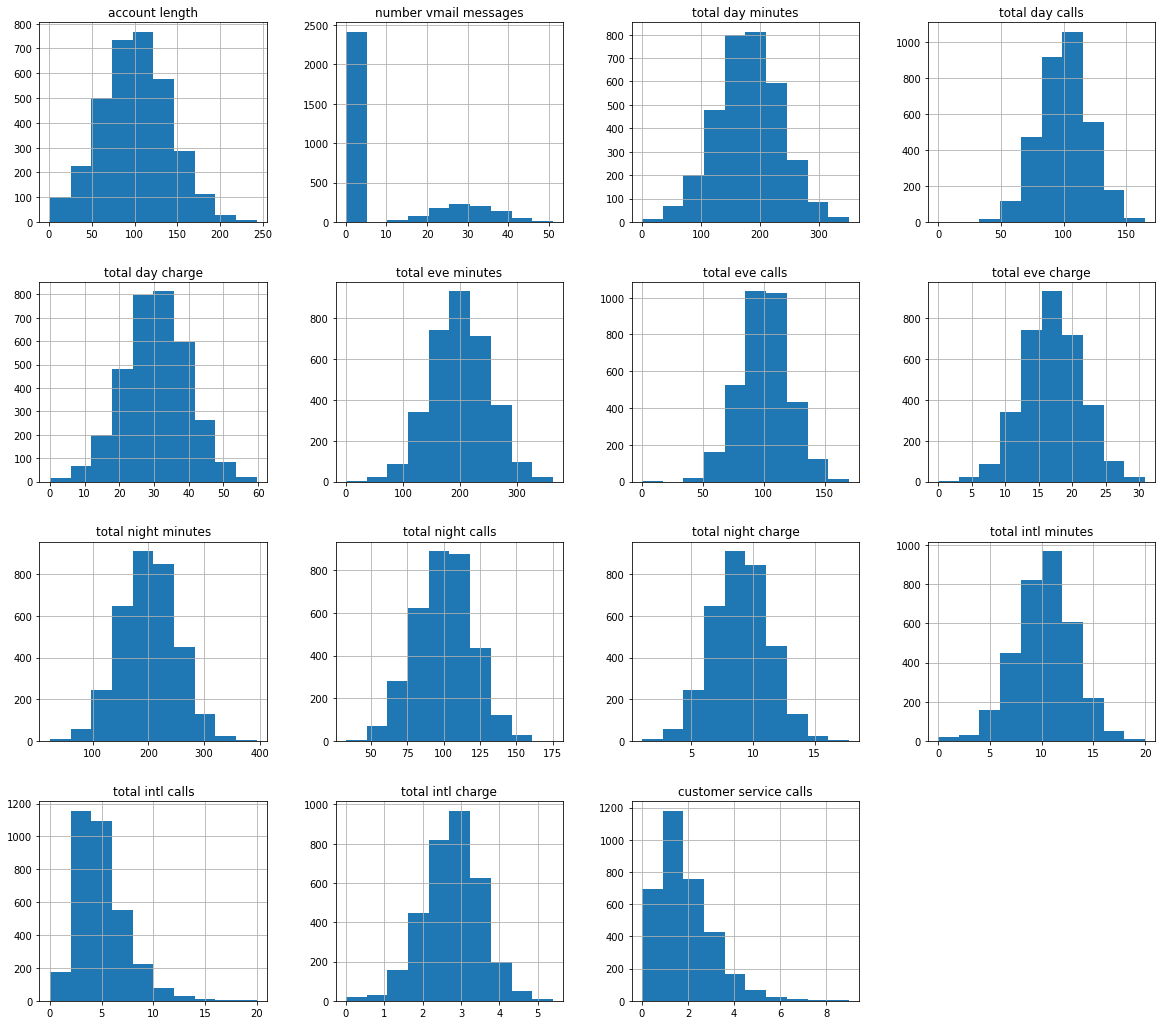

In [183]:
df.hist(figsize = (20,18));

In [184]:
# Selecting categorical variables
categorical = df.select_dtypes(include=['object'])
#Selecting numerical variables
numerical = df.select_dtypes(include=['number'])



In [185]:
#Checking the frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
area code
415    1655
510     840
408     838
Name: count, dtype: int64
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64
churn
No     2850
Yes     483
Name: count, d

### Number of labels: cardinality

In [186]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
area code  contains  3  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels
churn  contains  2  labels


The phone number and state has a  high cadinality and may pose problems in the classification model. Therefore the two features were dropped

In [187]:
# Dropping phone number
categorical.drop(['phone number', 'state'], axis=1, inplace=True)

In [188]:
# View categorical variables
categorical

,area code,international plan,voice mail plan,churn
0,415,no,yes,No
1,415,no,yes,No
2,415,no,no,No
3,408,yes,no,No
4,415,yes,no,No
...,...,...,...,...
3328,415,no,yes,No
3329,415,no,no,No
3330,510,no,no,No
3331,510,yes,no,No


In [169]:
# View the numeric dataset
numerical

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


### Outliers in numerical variables

In [200]:
# Outlier Analysis
# defining a function for plotting boxplot
def boxplot_graph(df, number_of_columns):
    numerical_columns = df.columns.tolist()

    # Creating subplots
    num_columns = len(numerical_columns)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plotting each column in a separate subplot
    for i, column in enumerate(numerical_columns):
        sns.boxplot(y=df[column], color="r", ax=axes[i])
        axes[i].set_title(column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to add space between rows
    plt.subplots_adjust(hspace=3) 

    plt.suptitle('Box Plots of Different Columns')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
    return plt.show()

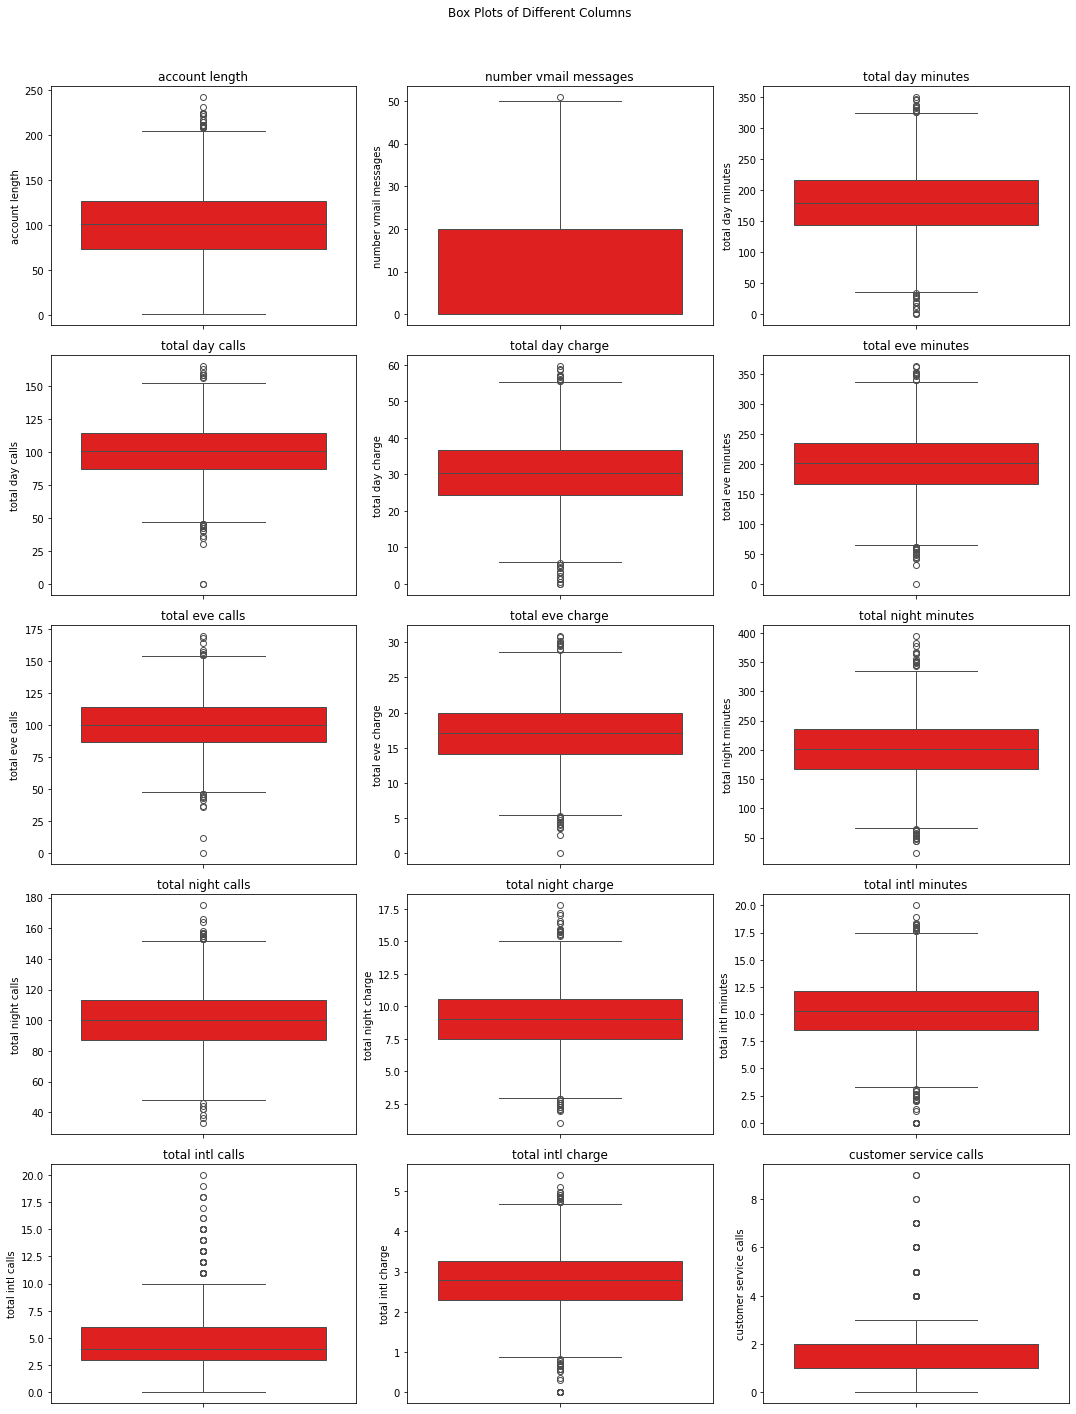

In [201]:
# Outlier Analysis for the numerical variables
boxplot_graph(numerical, 3)